In [205]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import plotly.express as px
import xgboost as xgb

In [173]:
df = pd.read_csv('online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [175]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [176]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [177]:
df.dropna(subset = ['CustomerID'], inplace = True)

In [178]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [179]:
df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [180]:
df.drop(df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)].index, inplace = True)

In [181]:
#Feature Engineering 
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [182]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
newDf = df.groupby('CustomerID').agg({'TotalPrice' : 'sum', 'InvoiceDate' : 'max'}).reset_index()
newDf.head()

,CustomerID,TotalPrice,InvoiceDate
0,12346.0,77183.60,2011-01-18 10:01:00
1,12347.0,4310.00,2011-12-07 15:52:00
2,12348.0,1797.24,2011-09-25 13:13:00
3,12349.0,1757.55,2011-11-21 09:51:00
4,12350.0,334.40,2011-02-02 16:01:00


In [183]:
#Calculating frequency of purchases 
frequencyDf = df.groupby('CustomerID').size().reset_index(name = 'Freq_Purch')
frequencyDf.head()

,CustomerID,Freq_Purch
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [184]:
# Merging the two dataframes
newDf = newDf.merge(frequencyDf, on = 'CustomerID')
newDf.rename(columns = {'InvoiceDate' : 'Rec_Purch'}, inplace = True)
newDf.reset_index()
newDf.head()

,CustomerID,TotalPrice,Rec_Purch,Freq_Purch
0,12346.0,77183.60,2011-01-18 10:01:00,1
1,12347.0,4310.00,2011-12-07 15:52:00,182
2,12348.0,1797.24,2011-09-25 13:13:00,31
3,12349.0,1757.55,2011-11-21 09:51:00,73
4,12350.0,334.40,2011-02-02 16:01:00,17


In [185]:
#calculating average purchase value for each customer
newDf['Avg_Purch'] = newDf['TotalPrice'] / newDf['Freq_Purch']
newDf.head()

,CustomerID,TotalPrice,Rec_Purch,Freq_Purch,Avg_Purch
0,12346.0,77183.60,2011-01-18 10:01:00,1,77183.600000
1,12347.0,4310.00,2011-12-07 15:52:00,182,23.681319
2,12348.0,1797.24,2011-09-25 13:13:00,31,57.975484
3,12349.0,1757.55,2011-11-21 09:51:00,73,24.076027
4,12350.0,334.40,2011-02-02 16:01:00,17,19.670588


In [186]:
#Calculating the recency of the last purchase
currentDate = pd.to_datetime(datetime.now().date())
newDf['Rec_Purch'] = (currentDate - newDf['Rec_Purch']).dt.days
newDf.rename(columns = {'Rec_Purch' : 'Recency'}, inplace = True)
newDf.head()

,CustomerID,TotalPrice,Recency,Freq_Purch,Avg_Purch
0,12346.0,77183.60,4886,1,77183.600000
1,12347.0,4310.00,4563,182,23.681319
2,12348.0,1797.24,4636,31,57.975484
3,12349.0,1757.55,4579,73,24.076027
4,12350.0,334.40,4871,17,19.670588


In [187]:
newDf["Recency_score"] = pd.qcut(newDf['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
newDf["Frequency_score"] = pd.qcut(newDf['Freq_Purch'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
newDf.head()

,CustomerID,TotalPrice,Recency,Freq_Purch,Avg_Purch,Recency_score,Frequency_score
0,12346.0,77183.60,4886,1,77183.600000,1,1
1,12347.0,4310.00,4563,182,23.681319,5,5
2,12348.0,1797.24,4636,31,57.975484,2,3
3,12349.0,1757.55,4579,73,24.076027,4,4
4,12350.0,334.40,4871,17,19.670588,1,2


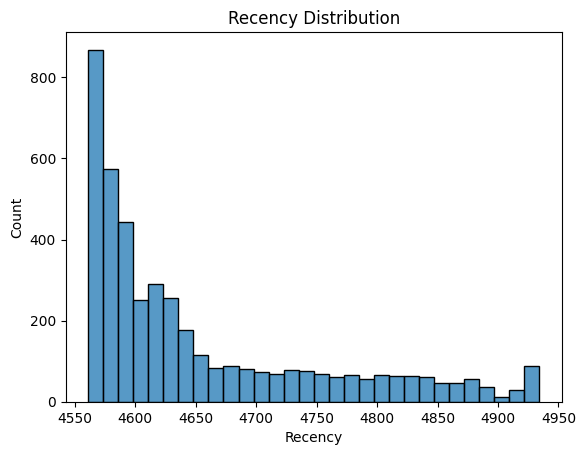

In [188]:
sns.histplot(data = newDf, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

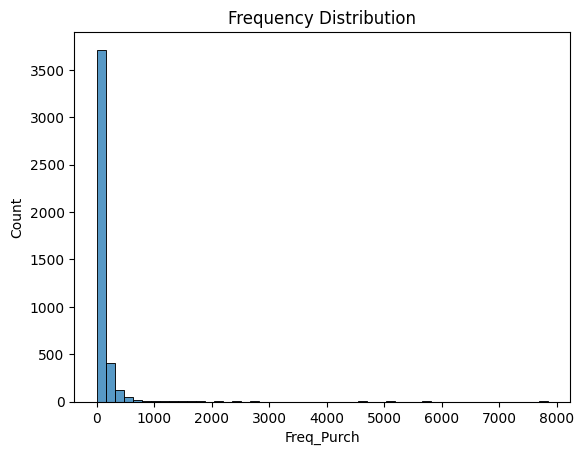

In [189]:
sns.histplot(data = newDf, x = 'Freq_Purch', bins = 50)
plt.title('Frequency Distribution')
plt.show()

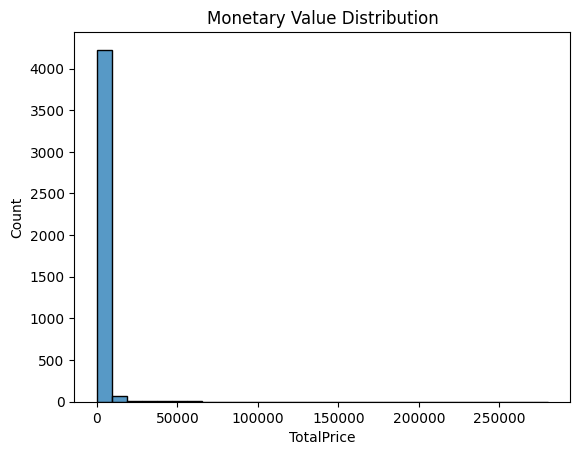

In [190]:
sns.histplot(data = newDf, x = 'TotalPrice', bins = 30)
plt.title('Monetary Value Distribution')
plt.show()

In [191]:
newDf["rfm_segment"] = newDf['Recency_score'].astype(str) + newDf['Frequency_score'].astype(str)

In [192]:
segment_map = {
    r'[1-2][1-2]' : 'Hibernating',
    r'[1-2][3-4]' : 'At-Risk',
    r'[1-2]5' : "Can\'t Loose",
    r'3[1-2]' : 'About to Slip',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Champions',
}

In [193]:
newDf['rfm_segment'] = newDf['rfm_segment'].replace(segment_map, regex = True)

In [194]:
newDf.head()

,CustomerID,TotalPrice,Recency,Freq_Purch,Avg_Purch,Recency_score,Frequency_score,rfm_segment
0,12346.0,77183.60,4886,1,77183.600000,1,1,Hibernating
1,12347.0,4310.00,4563,182,23.681319,5,5,Champions
2,12348.0,1797.24,4636,31,57.975484,2,3,At-Risk
3,12349.0,1757.55,4579,73,24.076027,4,4,Loyal Customers
4,12350.0,334.40,4871,17,19.670588,1,2,Hibernating


In [195]:
#selecting the features for clustering
features = newDf[['TotalPrice','Recency', 'Freq_Purch']]

#Normalising the features 
scaler = StandardScaler()
features = scaler.fit_transform(features)

#Detrermining the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)


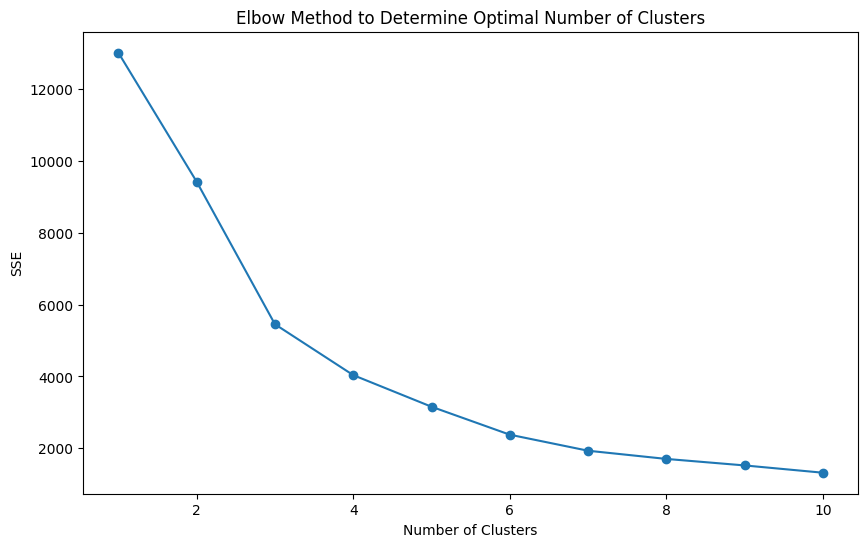

In [196]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [197]:
optimal_clusters = 3  # Choose the optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
newDf['cluster'] = kmeans.fit_predict(features)
newDf.head()

,CustomerID,TotalPrice,Recency,Freq_Purch,Avg_Purch,Recency_score,Frequency_score,rfm_segment,cluster
0,12346.0,77183.60,4886,1,77183.600000,1,1,Hibernating,1
1,12347.0,4310.00,4563,182,23.681319,5,5,Champions,0
2,12348.0,1797.24,4636,31,57.975484,2,3,At-Risk,0
3,12349.0,1757.55,4579,73,24.076027,4,4,Loyal Customers,0
4,12350.0,334.40,4871,17,19.670588,1,2,Hibernating,1


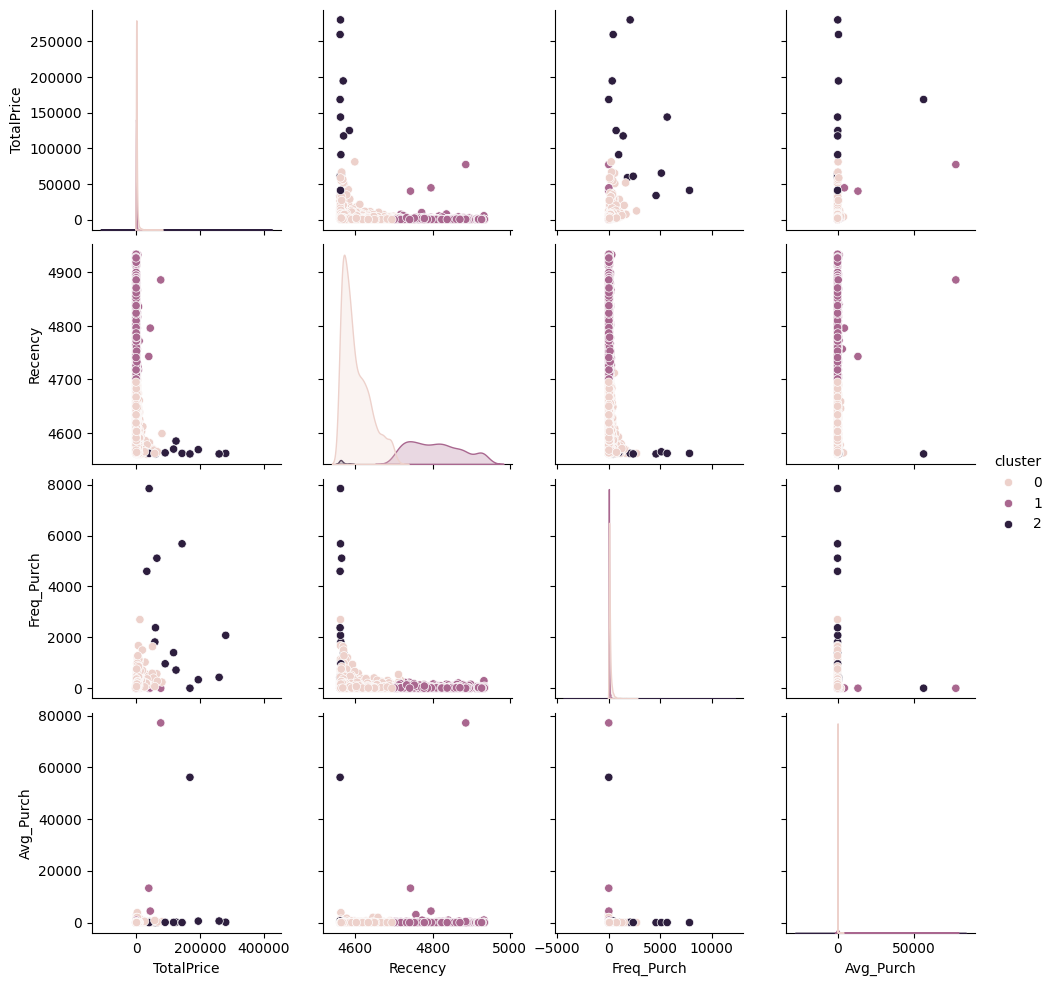

In [198]:
sns.pairplot(newDf, hue='cluster', vars=['TotalPrice','Recency', 'Freq_Purch', 'Avg_Purch'])
plt.show()

In [199]:
newDf['FutureSpending'] = np.random.rand(len(newDf)) * 3000
newDf.head()
#0.2 is use as an arbitrary value to calculate the CLV. It represents gross margin

,CustomerID,TotalPrice,Recency,Freq_Purch,Avg_Purch,Recency_score,Frequency_score,rfm_segment,cluster,FutureSpending
0,12346.0,77183.60,4886,1,77183.600000,1,1,Hibernating,1,2269.952417
1,12347.0,4310.00,4563,182,23.681319,5,5,Champions,0,565.714777
2,12348.0,1797.24,4636,31,57.975484,2,3,At-Risk,0,948.607662
3,12349.0,1757.55,4579,73,24.076027,4,4,Loyal Customers,0,2601.018794
4,12350.0,334.40,4871,17,19.670588,1,2,Hibernating,1,771.441554


In [201]:
trainFeatures = newDf[['TotalPrice','Recency', 'Freq_Purch', 'Avg_Purch', 'cluster']]
target = newDf['FutureSpending']

trainFeatures = scaler.fit_transform(trainFeatures)
X_train, X_test, y_train, y_test = train_test_split(trainFeatures, target, test_size = 0.2, random_state = 42)

In [208]:
#Training the model 
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 731153.0639154977
R2 Score: -0.0011794700767917554
Mean Absolute Error: 736.0669884137088


In [203]:
results_df = pd.DataFrame({'Future Spending': y_test, 'Predicted Spending': y_pred})
results_df

,Future Spending,Predicted Spending
3976,79.456226,1482.578848
1448,552.451526,1478.343293
2663,843.085943,1492.184343
17,2524.740182,1494.652626
1634,2401.595332,1462.398654
...,...,...
3467,318.948880,1487.477126
2644,2411.738921,1495.430574
416,2704.964207,1493.615148
1616,651.329544,1476.684614


In [ ]:
segments = newDf['rfm_segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

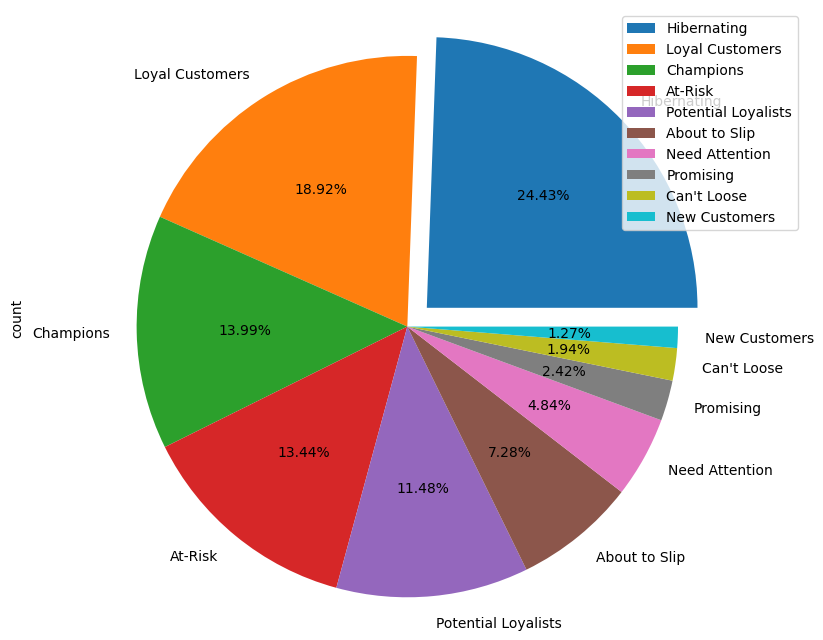

In [ ]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segments.plot(
    kind = 'pie',
    color=segments.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()